# Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
import json

In [4]:
from PIL import Image
import requests
from io import BytesIO

# Data Cleaning

In [5]:
# import movies data
pd.options.display.max_columns = None
df = pd.read_csv("./data/movies_metadata.csv")
df.head(2)

C:\Users\mahat\AppData\Local\Temp\ipykernel_24156\4043699683.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/movies_metadata.csv")


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [7]:

df.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [8]:
df[df['popularity'].isna()]['title']

19729    NaN
19730    NaN
29502    NaN
29503    NaN
35586    NaN
Name: title, dtype: object

In [9]:
df = df.dropna(subset='title')

In [10]:
df['adult'].unique()

array(['False', 'True'], dtype=object)

In [11]:
df[df['adult'] != "False"]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19489,True,NaN,0,"[{'id': 27, 'name': 'Horror'}]",NaN,5422,tt0079642,it,Le notti erotiche dei morti viventi,A sailor takes an American businessman and his...,1.420104,/tzVK7nTnzUiVeFSZhOAIHmrgXUS.jpg,"[{'name': 'Stefano Film', 'id': 6117}]","[{'iso_3166_1': 'IT', 'name': 'Italy'}]",1980-11-18,0.0,112.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,NaN,Erotic Nights of the Living Dead,False,2.2,7.0
28701,True,NaN,0,"[{'id': 80, 'name': 'Crime'}]",http://www.imdb.com/title/tt0119931/,169158,tt0119931,en,Standoff,The FBI and Texas police make ready to storm t...,1.349745,/1VzwIa8HTykNiCCW8PBaJnyTvO8.jpg,"[{'name': 'Trimark Pictures', 'id': 4063}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1998-01-11,0.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Trust Will Get You Killed,Standoff,False,4.8,5.0
31934,True,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,44781,tt0322232,cn,發電悄嬌娃,Electrical Girl centers around a horny young w...,0.001803,/yTfqRQlJMTAuTNDG01XjNg5KPPg.jpg,[],"[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2001-04-26,0.0,89.0,"[{'iso_639_1': 'cn', 'name': '广州话 / 廣州話'}]",Released,NaN,Electrical Girl,False,0.0,0.0
32113,True,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.dietofsex.com/,324230,tt3094816,es,Diet of Sex,Ágata suffers from a psychological disorder wh...,6.889832,/oP2WvKIWxqSBVHjfYAizFHOqBLG.jpg,"[{'name': 'KeyAtomics', 'id': 46055}]","[{'iso_3166_1': 'ES', 'name': 'Spain'}]",2014-02-14,0.0,72.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,"Comedy, food, drama and sex, a lot of sex",Diet of Sex,False,4.0,12.0
39901,True,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 27, 'name...",NaN,35731,tt1161951,en,Amateur Porn Star Killer 2,Shane Ryan's sequel to the disturbing Amateur ...,0.587751,/zpycBSiBFp5Uib6gWJpgEvfOgdn.jpg,"[{'name': 'Alter Ego Cinema', 'id': 5639}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2008-05-13,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Humiliation. Rape. Murder. You know the drill.,Amateur Porn Star Killer 2,False,6.3,8.0
39902,True,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,55774,tt1153101,en,The Band,Australian film about a fictional sub-par Aust...,0.417214,/e7CAc8OadcUoKNPIX86SEPSX7f.jpg,[],"[{'iso_3166_1': 'AU', 'name': 'Australia'}]",2009-11-17,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Sex, drugs and Rock 'n Roll",The Band,False,3.3,7.0
40574,True,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 27, 'name...",NaN,39922,tt0070696,da,Dværgen,Olaf and his mother run a boarding house and a...,1.182635,/jjncR0vECvXVrBvr0A1vLghL4pN.jpg,"[{'name': 'Scandica Film', 'id': 48812}]","[{'iso_3166_1': 'DK', 'name': 'Denmark'}, {'is...",1973-12-20,0.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Mother of all Dwarfsploitation films!,The Sinful Dwarf,False,5.8,13.0
41009,True,NaN,750000,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",NaN,376004,tt4044464,en,Adulterers,A man who returns home to find his wife cheati...,1.13377,/pJLmZBruOmn2c9mYWe3h1xcXaA0.jpg,[],[],2016-01-05,0.0,80.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Love. Betrayal. Vengeance,Adulterers,False,5.2,16.0
43090,True,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",NaN,448290,tt2697688,en,Half -Life,An American scientific research facility opens...,0.28268,/3uv9oaqOJkkdZiQp6r9lf24tkHW.jpg,"[{'name': 'Bad Robot', 'id': 11461}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",NaN,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",In Production,NaN,Half -Life,False,3.7,3.0


In [12]:
df[df['status'] != 'Released']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
189,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,56088,tt0114435,en,The Show,A documentary about the culture of hip-hop. Th...,0.159596,/qUlVaRYuiMvr1R3ZBW6hpS9QB4h.jpg,[],[],1995-08-25,0.0,93.0,[],NaN,What Happens On Stage Is Only Half The Story!,The Show,False,5.3,2.0
682,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,48260,tt0112604,en,Butterfly Kiss,Eunice is walking along the highways of northe...,0.877853,/tIN2dXB01aKycVqhcQ2PKTuQIhV.jpg,"[{'name': 'Dan Films', 'id': 1854}, {'name': '...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1995-08-18,0.0,88.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Rumored,NaN,Butterfly Kiss,False,7.4,5.0
767,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",http://www.tsquare.tv/film/,52059,tt0113147,en,The Gate of Heavenly Peace,The Gate of Heavenly Peace is a feature-length...,0.10705,/h5pKvDcSJSTGBV83uk3yhWjX23X.jpg,[],[],1995-01-01,0.0,180.0,[],NaN,NaN,The Gate of Heavenly Peace,False,6.7,3.0
775,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,44495,tt0072362,en,A Very Natural Thing,"When David, an ex-monk still in his twenties m...",0.147662,/4MsrBHWIClZIcd66XsWUn4lt2LO.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",1974-01-01,0.0,80.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Rumored,NaN,A Very Natural Thing,False,6.3,3.0
1032,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,38191,tt0117781,en,The Sunchaser,A young half-Navajo convict (Jon Seda) dying o...,2.35809,/8b7rrZx50M0mhmRFlY2zXl6Kk7N.jpg,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1996-05-29,0.0,122.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Rumored,It began as a kidnapping. It became a journey ...,The Sunchaser,False,6.1,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45109,False,NaN,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",NaN,63568,tt0147806,ru,A Esli Eto Lyubov?,High school students Ksenya and Boris are in l...,0.104567,/chxRIBYnD1amwQFrByU549dbMbI.jpg,"[{'name': 'Mosfilm', 'id': 5120}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1961-06-06,0.0,102.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Rumored,NaN,But What If This Is Love?,False,5.0,1.0
45159,False,NaN,0,[],NaN,41811,tt0099480,en,Eating,"At a spacious house in Los Angeles, Helene is ...",2e-06,/xZrCaSG0h7xMoGtQ0y0gT36B4wh.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",1990-11-30,0.0,110.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,NaN,Eating,False,0.0,0.0
45207,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",https://columbusthemovie.com,414453,tt5990474,en,Columbus,A Korean-born man finds himself stuck in Colum...,1.309265,/1YM144vixTdsrCzSmGUjdsRmL4D.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2017-08-04,0.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Post Production,NaN,Columbus,False,6.0,4.0
45289,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,87229,tt1524553,is,Kóngavegur,After 3 years abroad Junior returns to Iceland...,0.008498,/oPciNenBYXLbKoyTFPA006RNNop.jpg,"[{'name': 'Mystery Productions', 'id': 88966}]","[{'iso_3166_1': 'IS', 'name': 'Iceland'}]",2010-03-26,0.0,99.0,"[{'iso_639_1': 'is', 'name': 'Íslenska'}]",Rumored,When you are strange,King's Road,False,0.0,0.0


In [13]:
def replacing_with_NR(columns: list, value:"str|None|int"= None):
    for column in columns:
        df[column] = df[column].fillna("N/R")

In [14]:
replacing_with_NR(["belongs_to_collection","homepage","overview","tagline","poster_path"])

In [15]:
df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,N/R,Toy Story,False,7.7,5415.0
1,False,N/R,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",N/R,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",N/R,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,N/R,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",N/R,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",N/R,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,N/R,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,N/R,0,"[{'id': 18, 'name': 'Drama'}]",N/R,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,N/R,Century of Birthing,False,9.0,3.0
45463,False,N/R,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",N/R,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45

In [33]:
df.isna().sum()

adult                      0
belongs_to_collection      0
budget                     0
genres                     0
homepage                   0
id                         0
imdb_id                   17
original_language         11
original_title             0
overview                   0
popularity                 0
poster_path                0
production_companies       0
production_countries       0
release_date              84
revenue                    0
runtime                  257
spoken_languages           0
status                    81
tagline                    0
title                      0
video                      0
vote_average               0
vote_count                 0
dtype: int64

In [92]:
for i in range(0,50):
    req = requests.get("https://media.themoviedb.org/t/p/w300_and_h450_bestv2/" + df['poster_path'].loc[i], stream=True)
    print(i,req.status_code)

0 404
1 200
2 404
3 404
4 404
5 404
6 404
7 404
8 404
9 404
10 404
11 404
12 404
13 404
14 404
15 404
16 404
17 404
18 404
19 200
20 404
21 404
22 404
23 404
24 404
25 404
26 404
27 404
28 404
29 404
30 404
31 404
32 404
33 200
34 404
35 404
36 404
37 404
38 404
39 404
40 404
41 404
42 404
43 404
44 404
45 404
46 404
47 404
48 404
49 404


In [89]:
req.status_code #19, #33

404

In [95]:
req = requests.get("https://media.themoviedb.org/t/p/w300_and_h450_bestv2/" + df['poster_path'].loc[33], stream=True)

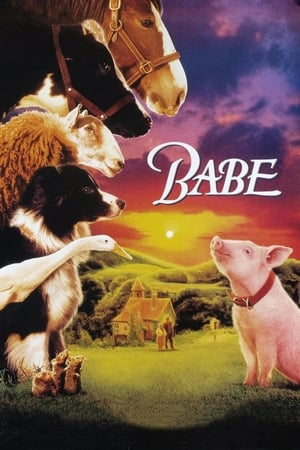

In [96]:
Image.open(req.raw)

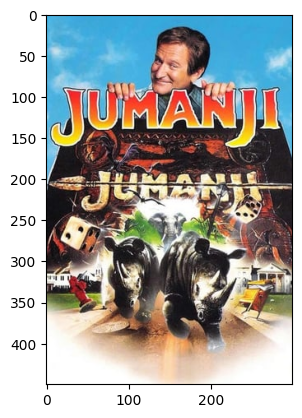

In [74]:
import urllib.request 
from PIL import Image 

img = Image.open(req.raw) 
plt.imshow(img)

In [98]:
df['original_language'].unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
       'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
       'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', nan, 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo', 'ay',
       'kn', 'eu', 'ne', 'pa', 'ky', 'gl', 'uz', 'sm', 'mt', 'hy', 'iu',
       'lb', 'si'], dtype=object)

In [103]:
df[df['title'] == "Toy Story"]


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,N/R,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",N/R,862,tt0114709,en,Toy Story,N/R,21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,N/R,Toy Story,False,7.7,5415.0


In [114]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [125]:
df['release_year'] = df['release_date'].dt.year
df['release_year'] = df['release_year'].astype(int)
    


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [116]:
df['new_title'] = df['title'] + " " + '(' + df['release_year'] + ')'

In [16]:
df.reset_index(inplace=True)

In [18]:
not_avail_dates = df[df['release_date'].isna()]

In [19]:
from selenium import webdriver
from selenium.webdriver.common.by import By

driver = webdriver.Chrome()
listin = []
for title in not_avail_dates['title']:
# action = ActionChains(driver)#
    try:
        driver.implicitly_wait(10)
        driver.get("https://www.google.com/")
        google_search = driver.find_element(By.CLASS_NAME,"gLFyf")
        google_search.send_keys(title + " release year")
        google_search.submit()
        get_year = driver.find_element(By.CLASS_NAME, "Z0LcW")
        listin.append(get_year.text)
    except:
        listin.append(None)

In [20]:
ind = not_avail_dates.index

In [21]:
for i,j in enumerate(ind,0):
    df.loc[j,'release_date'] = listin[i]

In [22]:
df[df['release_date'].isna()].shape

(21, 25)

In [23]:
list(df2.columns).index("release_date")

NameError: name 'df2' is not defined

In [24]:
df

,index,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,N/R,Toy Story,False,7.7,5415.0
1,1,False,N/R,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",N/R,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",N/R,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,3,False,N/R,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",N/R,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",N/R,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45455,45461,False,N/R,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",14 June 2017,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45456,45462,False,N/R,0,"[{'id': 18, 'name': 'Drama'}]",N/R,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,N/R,Century of Birthing,False,9.0,3.0
45457,45463,False,N/R,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",N/R,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A

In [204]:
not_avail_dates = df[df['release_date'].isna()]
driver = webdriver.Chrome()
listin = []
for title in not_avail_dates['title']:
# action = ActionChains(driver)#
    try:
        driver.implicitly_wait(10)
        driver.get("https://www.google.com/")
        google_search = driver.find_element(By.CLASS_NAME,"gLFyf")
        google_search.send_keys(title + " release year")
        google_search.submit()
        get_year = driver.find_element(By.XPATH, "//b")
        listin.append(get_year.text)
    except:
        listin.append(None)

In [205]:
listin

['movie',
 'CONNECTIONS',
 'error examples',
 'Erectile',
 '1995',
 'Afghanistan',
 'Reflection',
 '2013',
 'their',
 '1999',
 'In',
 '12 October 2008',
 'Ascended',
 'Expeditions',
 'why was',
 'Sentimentality',
 '2013',
 '2014',
 None,
 '13 May 2013',
 '',
 '2013',
 '2002',
 '',
 '2016',
 'Always Faithful',
 '2012',
 '2023',
 'hole milky way',
 'January 1, 2016',
 'April']

In [212]:
df = df.drop('index',axis=1)

In [25]:
df.to_csv("./data/movies_cleaned.csv",index=False)